In [13]:
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

In [14]:
###Import data
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()
df = pd.read_excel(file_path,header=26) #Save Excel data in dataframe
#df.head(10) ### Preview dataframe

In [15]:
### Perform initial trims (must be .xls file)
df = df.dropna(how='all',axis='columns') #Remove columns with no data

In [21]:
###Convert time to decimal hours format (only works for <24h run)
for i,item in enumerate(df['Time']):
    temp = dt.time.fromisoformat(str(df['Time'].iloc[i]))    
    df['Time'].iloc[i] = float(temp.hour + (temp.minute/60))
    
print(df)

          Time  T° 600    E10    E11    E12    F10    F11    F12    G10  \
0          0.0    36.9  0.090  0.090  0.091  0.095  0.099  0.100  0.107   
1     0.116667    37.0  0.089  0.090  0.090  0.094  0.098  0.098  0.107   
2     0.233333    37.0  0.089  0.090  0.090  0.094  0.098  0.098  0.108   
3         0.35    37.0  0.089  0.090  0.091  0.093  0.097  0.097  0.111   
4     0.466667    37.0  0.088  0.090  0.090  0.094  0.097  0.097  0.116   
..         ...     ...    ...    ...    ...    ...    ...    ...    ...   
106  12.416667    37.0  0.299  0.315  0.259  0.309  0.331  0.364  0.766   
107  12.533333    37.0  0.301  0.317  0.259  0.327  0.339  0.462  0.765   
108      12.65    37.0  0.301  0.318  0.259  0.289  0.342  0.402  0.766   
109  12.766667    37.0  0.302  0.318  0.259  0.289  0.365  0.452  0.764   
110  12.883333    37.0  0.303  0.320  0.260  0.300  0.332  0.413  0.767   

       G11    G12    H10    H11    H12  E. coli_avg  B. subtilis_avg  \
0    0.100  0.104  0.089  0

In [16]:
###Enter blank columns
print(df.head(10)) #Show data to aid in column selection

b = input("\nEnter any blank columns in a comma-separated list: ")
if not b.split():
    pass
else:
    for ind in b.split(","):
        if ind != " " or ind != "":
            ind = ind.strip()
            df = df.drop([ind], axis='columns')
        else:
            pass

       Time  T° 600    E10    E11    E12    F10    F11    F12    G10    G11  \
0  00:00:00    36.9  0.090  0.090  0.091  0.095  0.099  0.100  0.107  0.100   
1  00:07:00    37.0  0.089  0.090  0.090  0.094  0.098  0.098  0.107  0.100   
2  00:14:00    37.0  0.089  0.090  0.090  0.094  0.098  0.098  0.108  0.102   
3  00:21:00    37.0  0.089  0.090  0.091  0.093  0.097  0.097  0.111  0.104   
4  00:28:00    37.0  0.088  0.090  0.090  0.094  0.097  0.097  0.116  0.107   
5  00:35:00    37.0  0.089  0.090  0.090  0.096  0.096  0.096  0.122  0.111   
6  00:42:00    37.0  0.088  0.090  0.090  0.093  0.095  0.095  0.129  0.116   
7  00:49:00    37.0  0.089  0.090  0.091  0.092  0.095  0.095  0.137  0.121   
8  00:56:00    37.0  0.089  0.091  0.091  0.092  0.095  0.094  0.148  0.128   
9  01:03:00    37.0  0.090  0.091  0.091  0.092  0.094  0.093  0.160  0.138   

     G12    H10    H11    H12  
0  0.104  0.089  0.087  0.087  
1  0.104  0.089  0.087  0.087  
2  0.106  0.089  0.087  0.087  
3 

In [17]:
###Enter data series
series_bool = True
legend_names = []
names=[]
while series_bool:
    ans = str(input("\nWould you like to add a data series? "))
    if (ans == "yes" or ans == "y" or ans == "Y" or ans == "Yes" or ans == "YES"):
        data = []
        name = input("\nEnter the name for this data series: ")
        d = input("\nEnter the column(s) containing OD data for this series (separated by commas if in replicates): ")
        for ind in d.split(","):
            data.append(ind.strip())
        if len(d) > 1:
            df[name+'_avg']=df.loc[:,data].mean(axis=1) #Average duplicates, triplicates, etc.
            names.append(name+'_avg') #Save name of series to list
            legend_names.append(name)
        else:
            df[name+'_avg']=df[data]
    else:
        series_bool = False

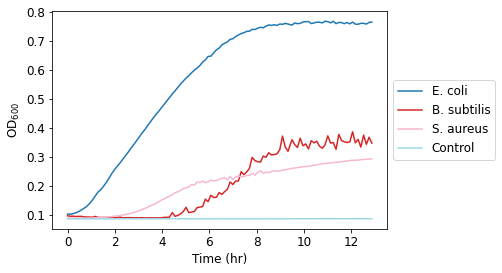

In [46]:
fig, ax1 = plt.subplots()
df.plot(x='Time', y=names, cmap = 'tab20', ax=ax1)
ax1.set_xlabel("Time (hr)")
ax1.set_ylabel("OD$_{600}$")
ax1.legend(legend_names, loc='center left', bbox_to_anchor=(1,0.5))
plt.rcParams.update({'font.size': 12})

plt.show()

In [47]:
plot_name = input('\nSave figure as: ')
fig.savefig(plot_name, bbox_inches = 'tight', dpi=500)